In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from PIL import Image
import tifffile as tiff

mpl.rcParams.update({'font.size':50}) #make font bigger to match figsize

In [2]:
img_path = r'O:\Desktop\WORLDMAP\GHS_POP_E2015_GLOBE_R2019A_54009_1K_V1_0.tif'

In [3]:
img = tiff.imread(img_path)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


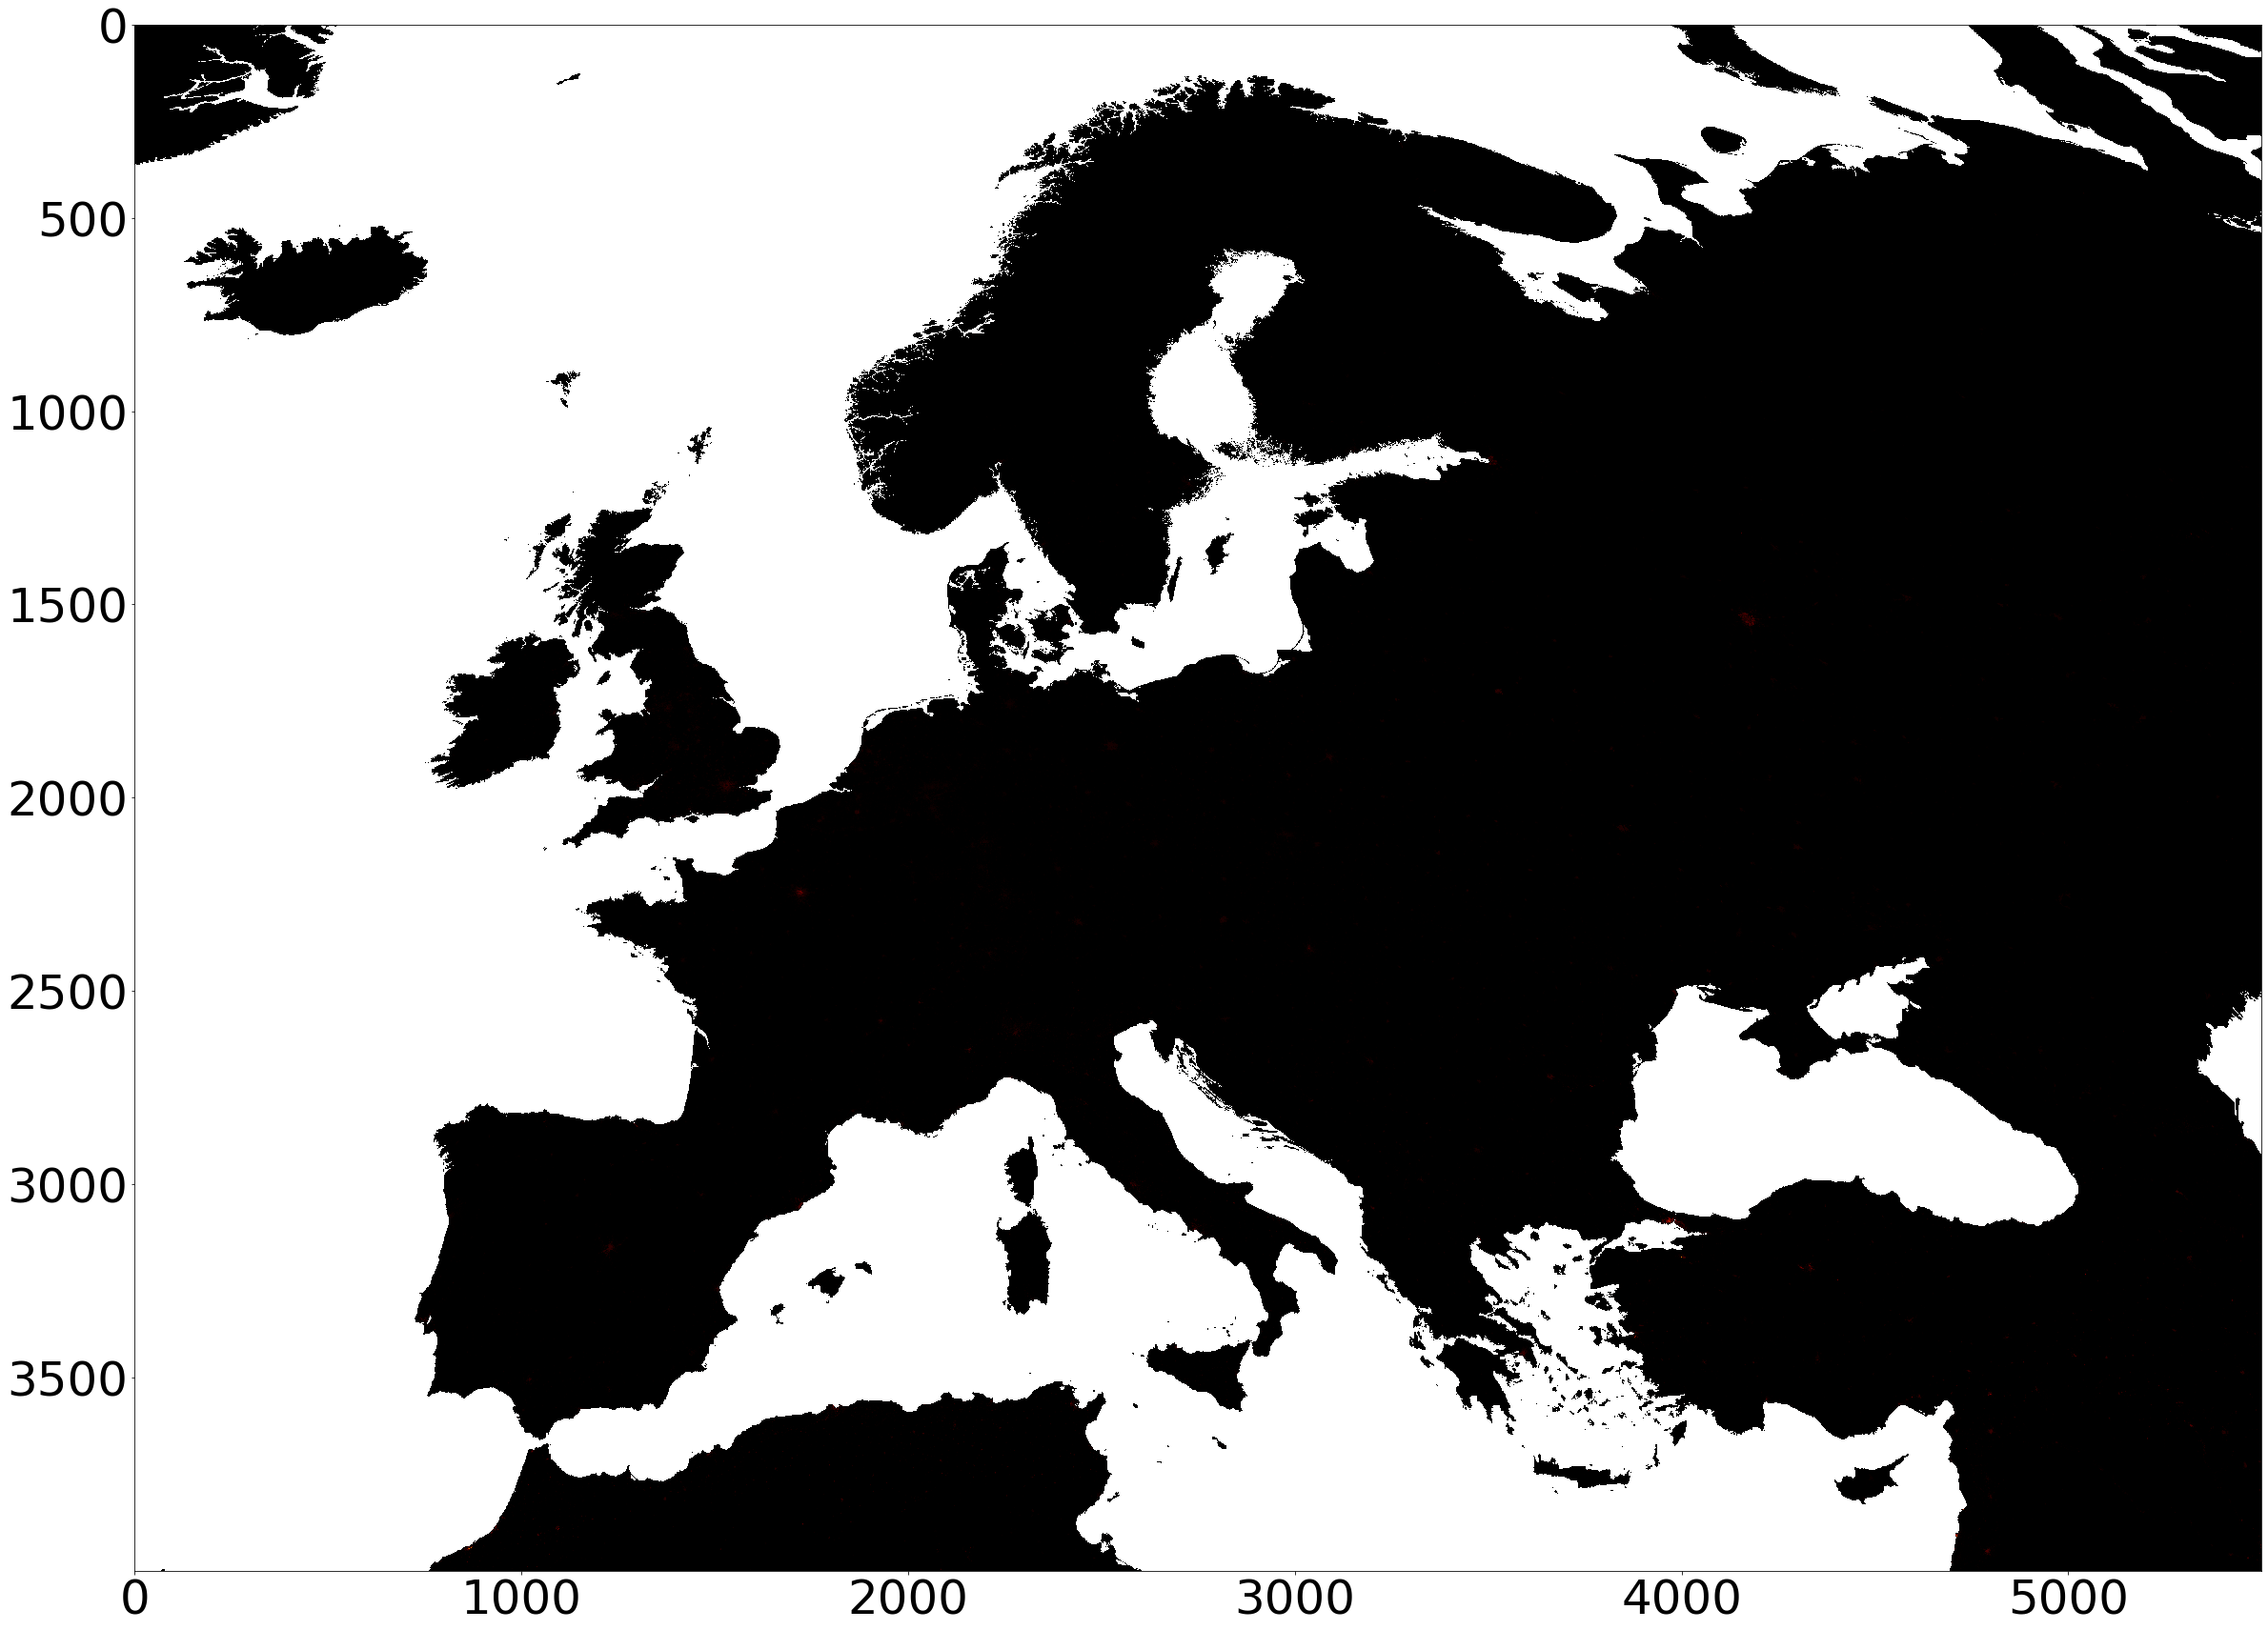

In [4]:
fig, ax = plt.subplots( figsize=(40, 40))
ax.imshow((img[1000:5000, 16500:22000]**0.5)**2, cmap="afmhot")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


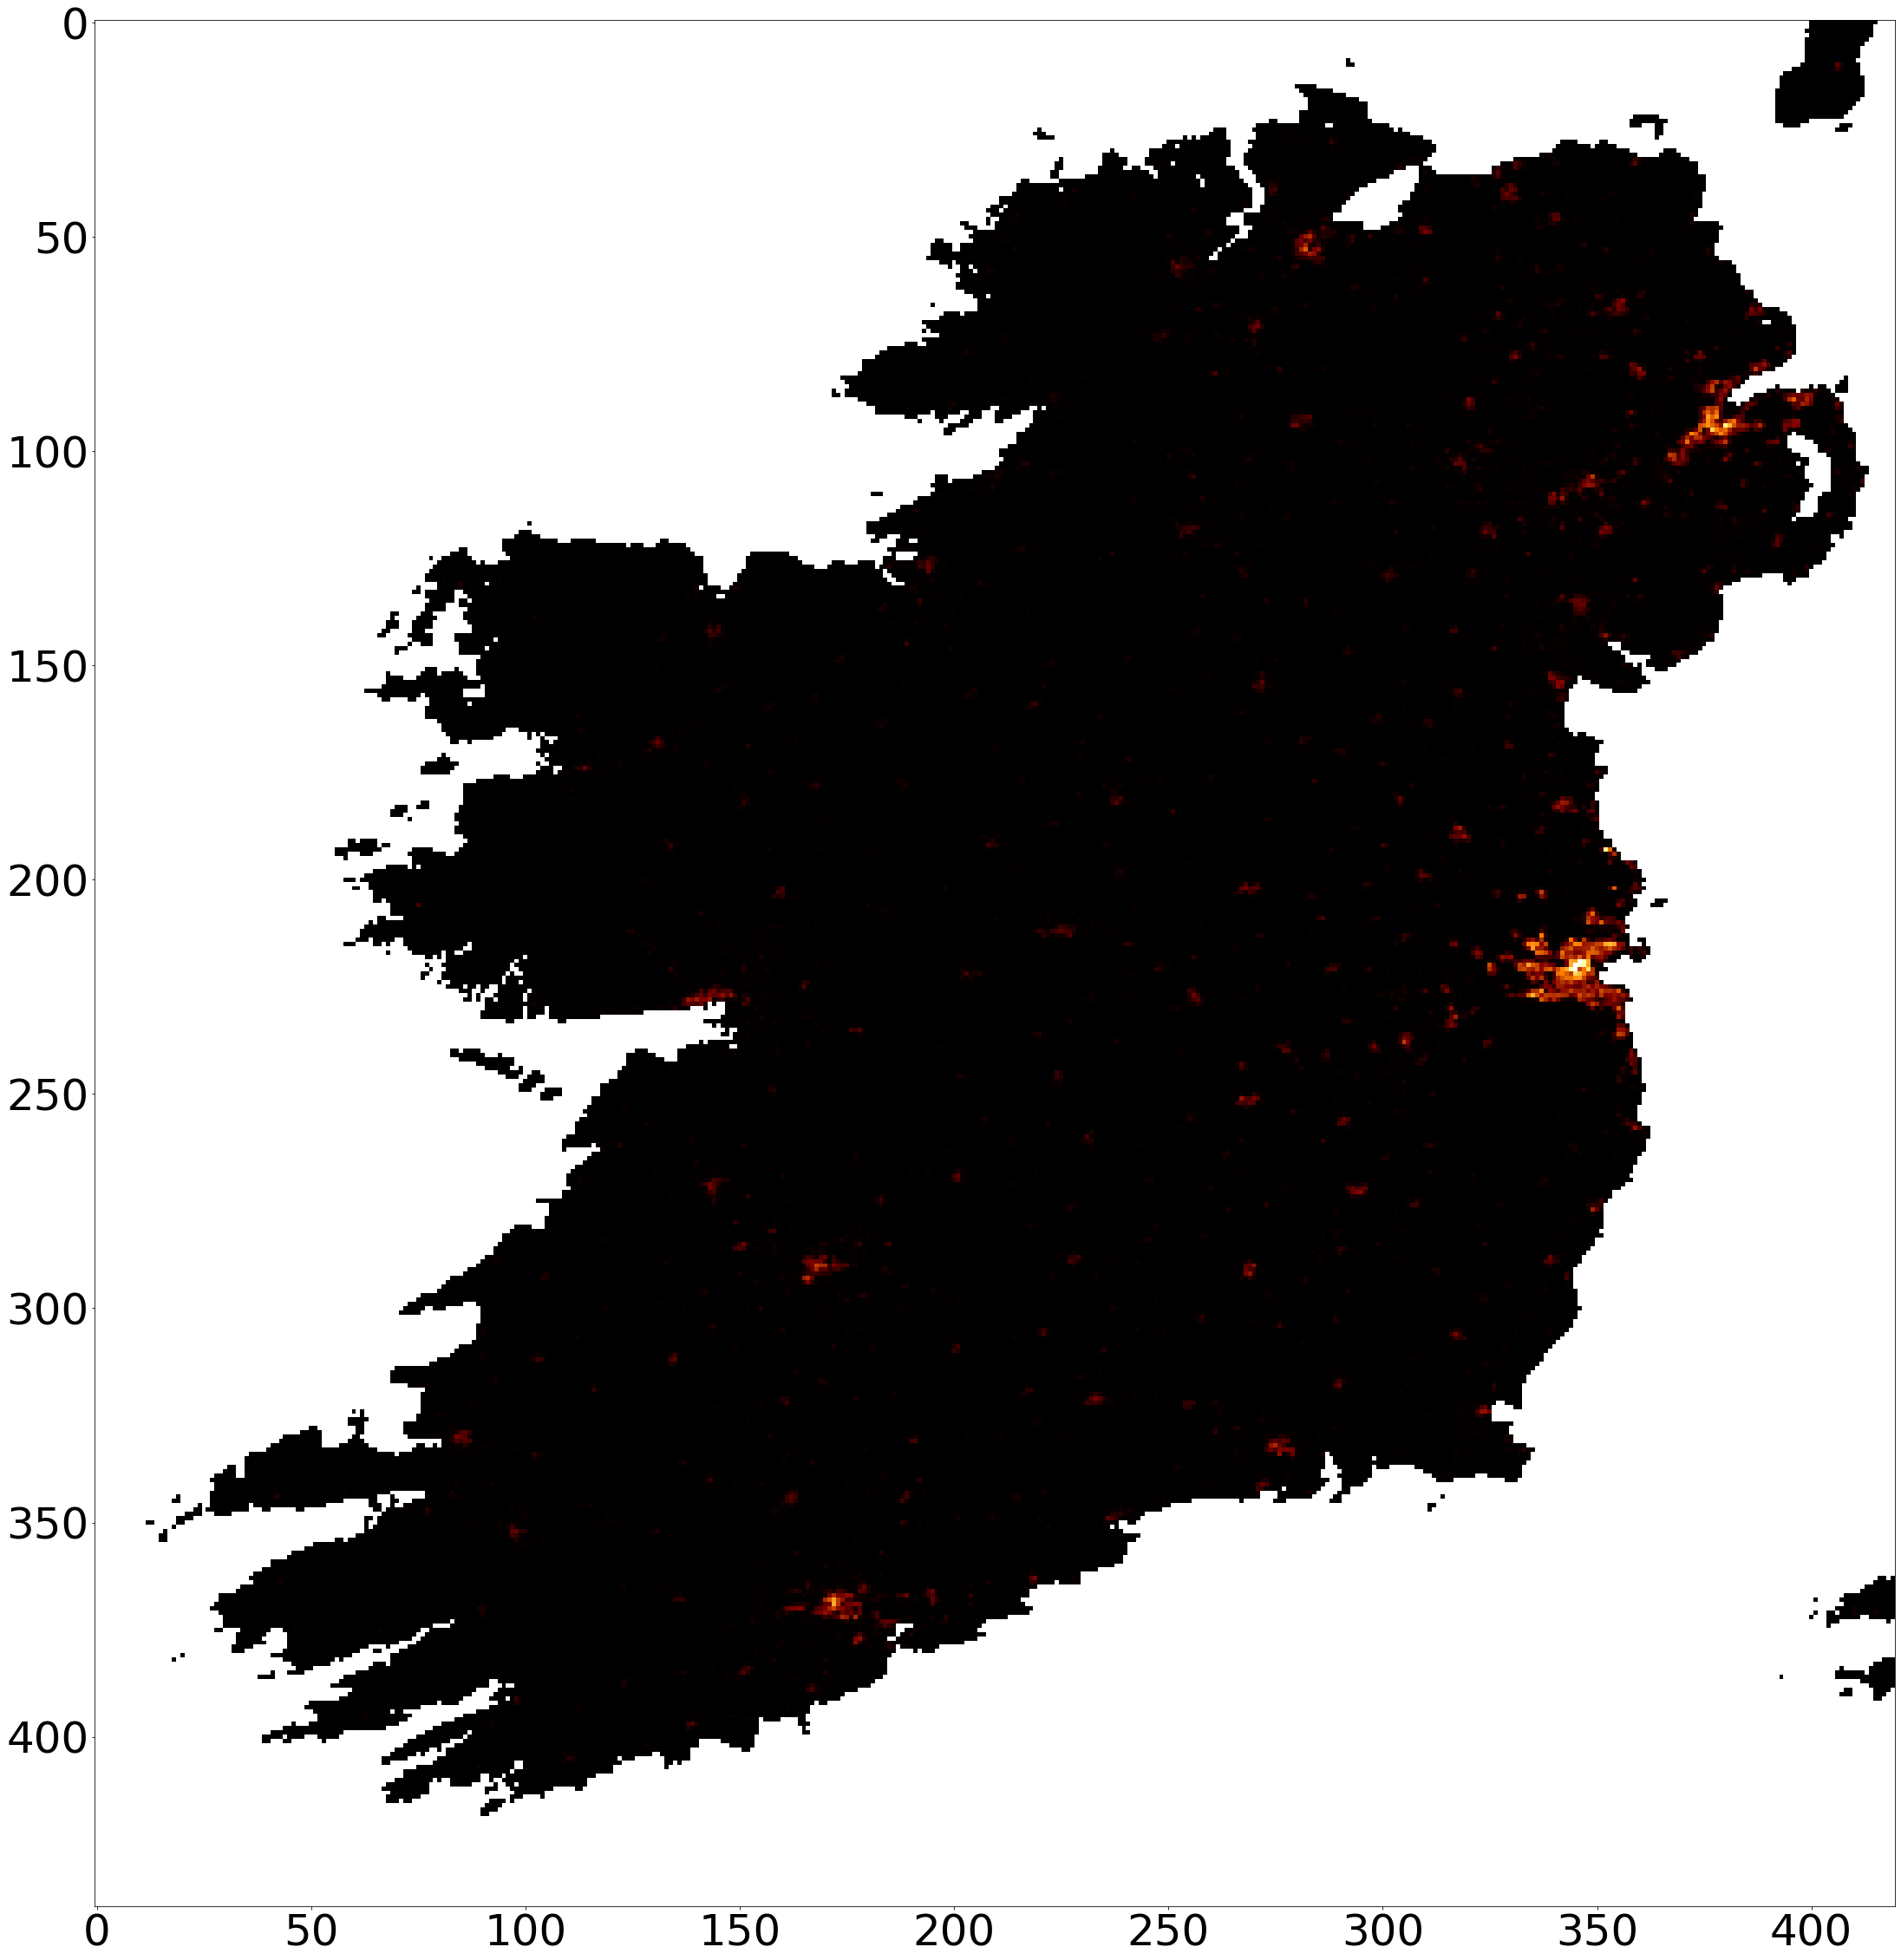

In [5]:
fig, ax = plt.subplots( figsize=(40, 40))
ax.imshow((img[2560:3000, 17240:17660]**0.5)**2, cmap="afmhot")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


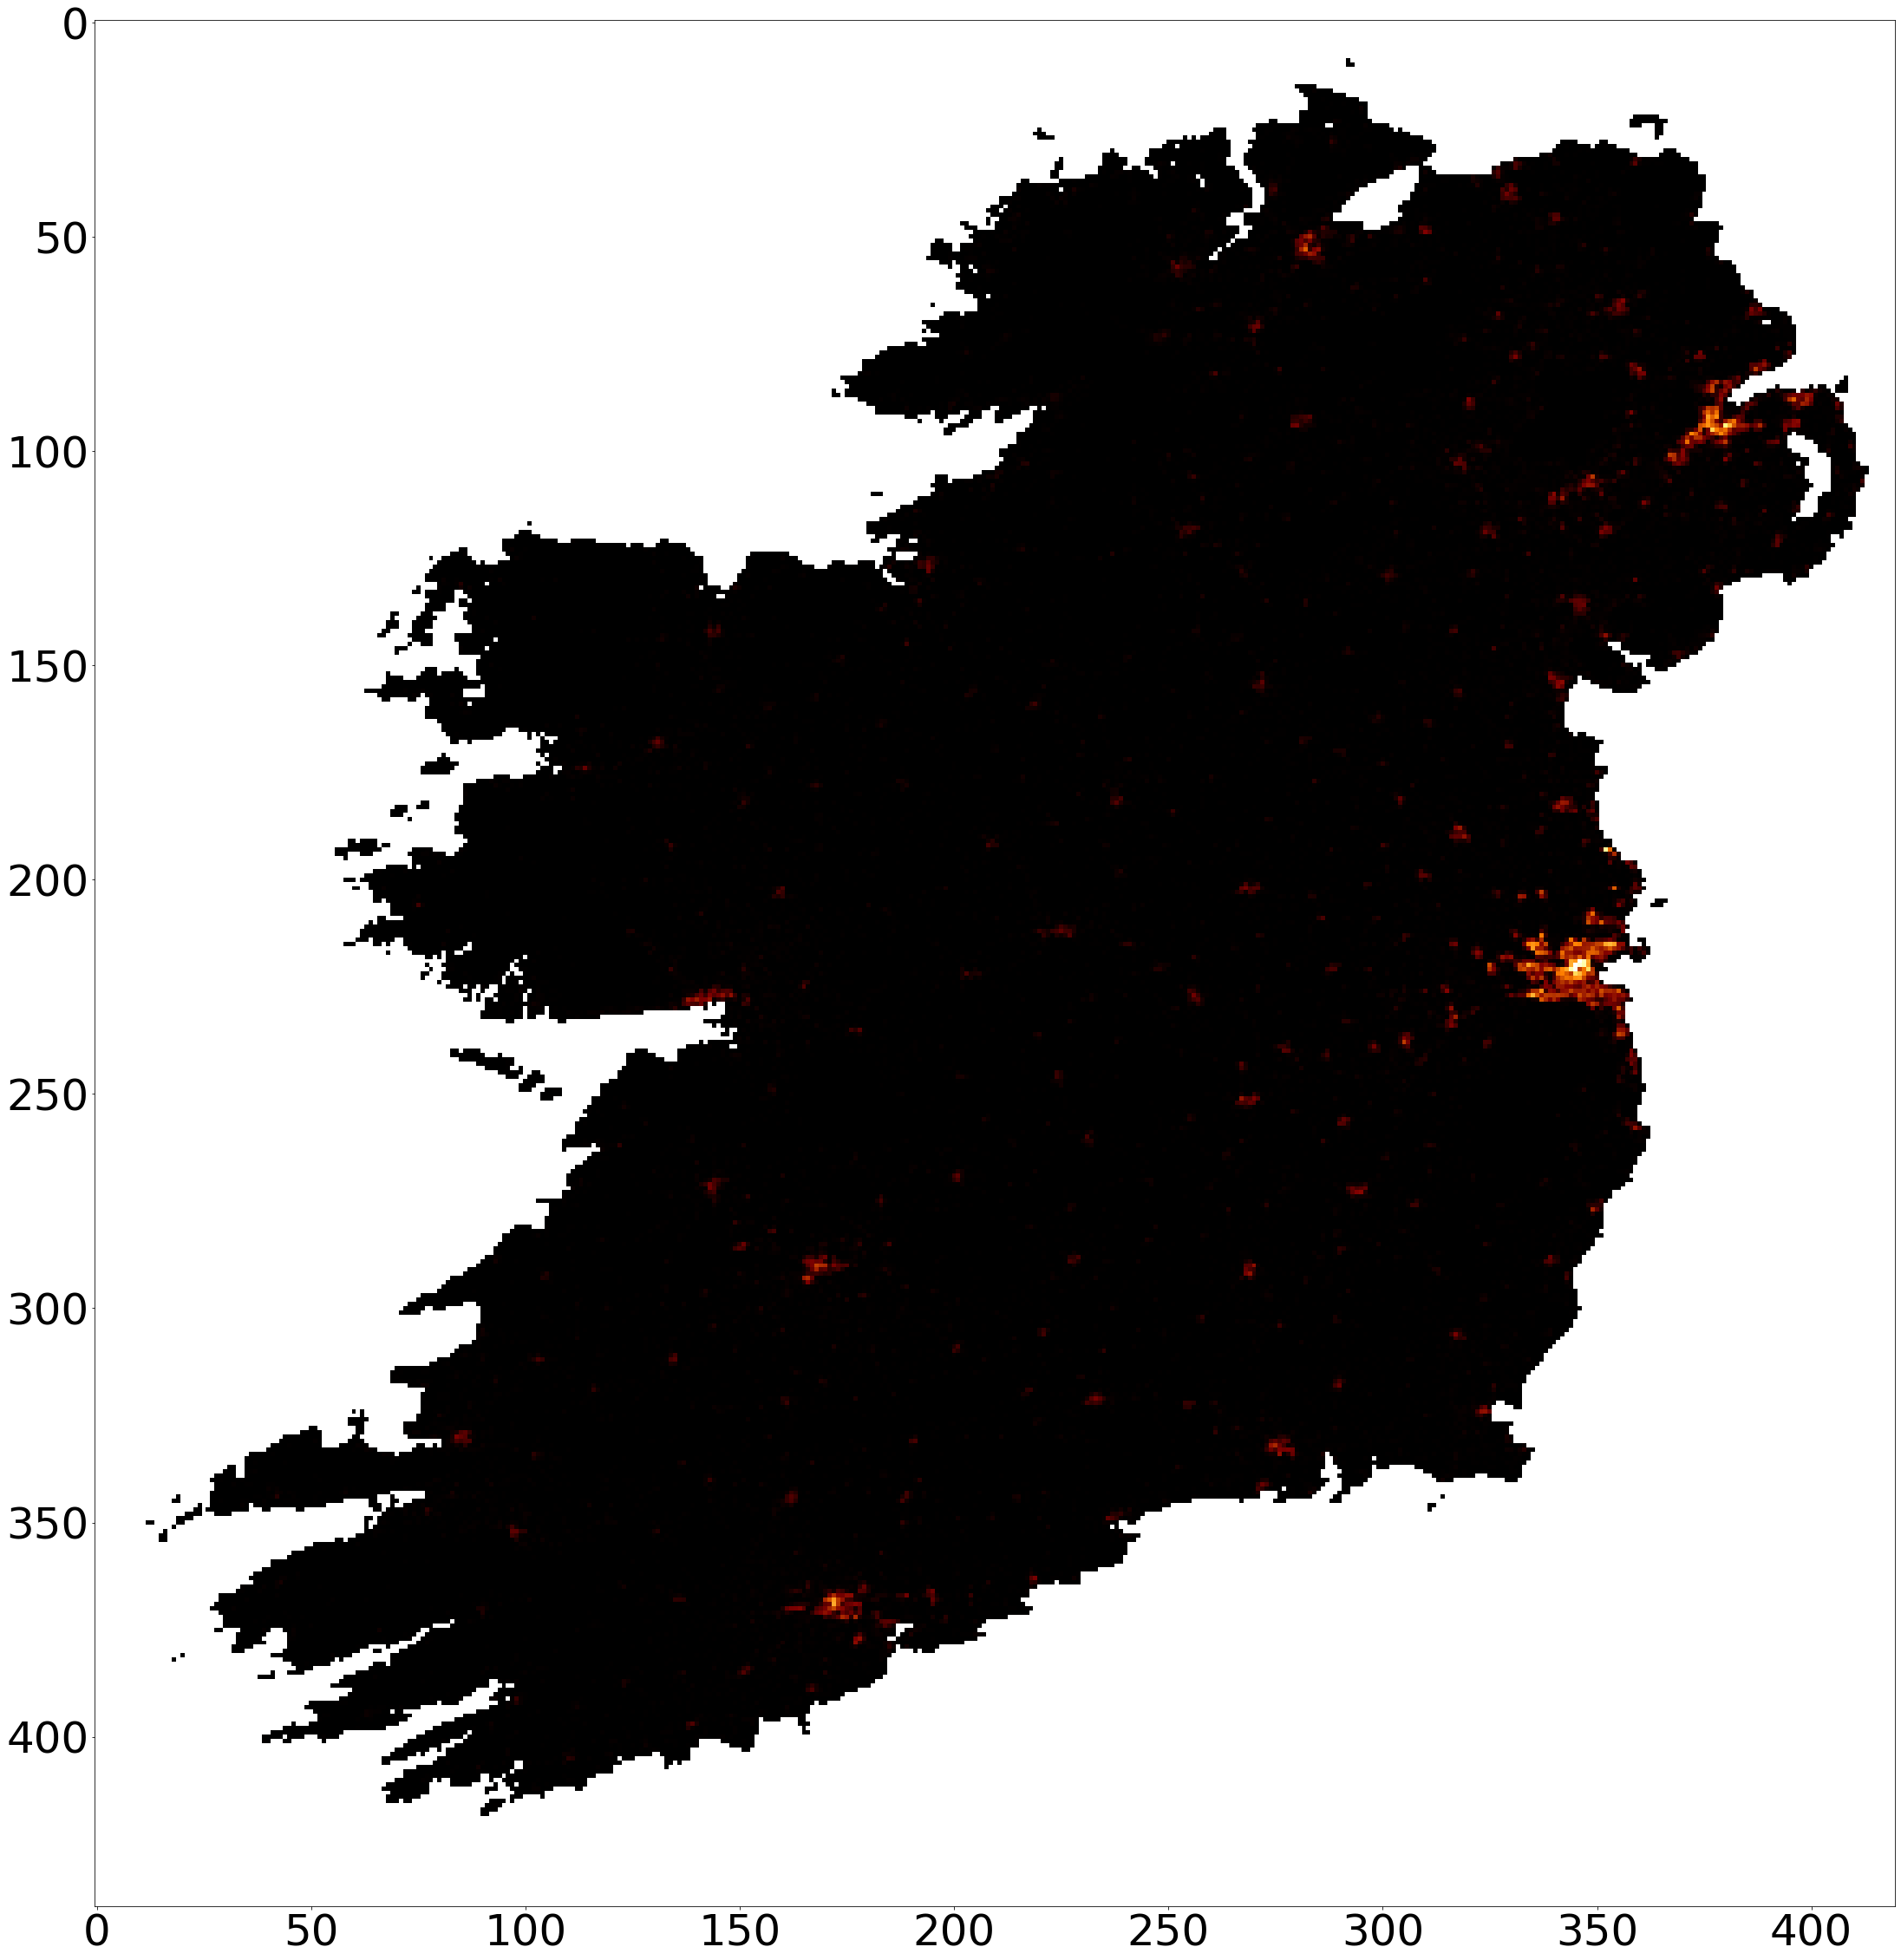

In [6]:
irl=img[2560:3000, 17240:17660]
irl[0:30, 370:420]=-200
irl[350:440, 370:420]=-200
fig, ax = plt.subplots( figsize=(40, 40))
ax.imshow((irl**0.5)**2, cmap="afmhot")

In [7]:
im = Image.fromarray(irl).convert('F')
export_image=np.asarray(im)

In [8]:
df = pd.DataFrame(data=export_image)
df.to_csv(r'O:\Desktop\WORLDMAP\IRELANDMAP.csv', sep=',', index=True)

In [ ]:
df=pd.read_csv(r'O:\Desktop\WORLDMAP\IRELANDMAP.csv', index_col=0)
df.head()

In [ ]:
vals=df.values
vals=np.array(vals).astype('float')
fig, ax = plt.subplots( figsize=(40, 40))
plot=ax.imshow((vals**0.5)**2, cmap="afmhot")
fig.colorbar(plot)

In [ ]:
fig, ax = plt.subplots( figsize=(40, 40))
plot=ax.imshow(vals, cmap="afmhot")
fig.colorbar(plot)

In [ ]:
test=np.where(vals<0, 0, vals)
test.sum()

In [ ]:
test=np.where((vals < 1000), np.where(vals>-200, -1, vals), vals)
test=np.array(test)
fig, ax = plt.subplots( figsize=(40, 40))
plot=ax.imshow(test**0.5, cmap="afmhot")
fig.colorbar(plot)

In [ ]:
#desampling first is actually probably better here

In [ ]:
re=[]
for i in range(int(len(vals)/2)):
    row1, row2=vals[2*i], vals[2*i+1]
    row=np.array(row1)+np.array(row2)
    re.append(row)
re=np.array(re)
fig, ax = plt.subplots( figsize=(40, 40))
plot=ax.imshow(re**0.5, cmap="afmhot")
fig.colorbar(plot)

In [ ]:
tdf=pd.DataFrame(re)
tdf=tdf.T
tdfvals=tdf.values
re=[]
for i in range(int(len(tdfvals)/2)):
    row1, row2=tdfvals[2*i], tdfvals[2*i+1]
    row=np.array(row1)+np.array(row2)
    re.append(row)
re=np.array(re)
tdf=pd.DataFrame(re)
tdf=tdf.T
re=tdf.values
fig, ax = plt.subplots( figsize=(40, 40))
plot=ax.imshow(re**0.5, cmap="afmhot")
fig.colorbar(plot)

In [ ]:
test=np.where((tdf < 2000), np.where(tdf>-200, -1, tdf), tdf)
test=np.array(test)
fig, ax = plt.subplots( figsize=(40, 40))
plot=ax.imshow(test**0.5, cmap="afmhot")
fig.colorbar(plot)

In [ ]:
vals=re
re=[]
for i in range(int(len(vals)/2)):
    row1, row2=vals[2*i], vals[2*i+1]
    row=np.array(row1)+np.array(row2)
    re.append(row)
re=np.array(re)
fig, ax = plt.subplots( figsize=(40, 40))
plot=ax.imshow(re**0.5, cmap="afmhot")
fig.colorbar(plot)
            
tdf=pd.DataFrame(re)
tdf=tdf.T
tdfvals=tdf.values
re=[]
for i in range(int(len(tdfvals)/2)):
    row1, row2=tdfvals[2*i], tdfvals[2*i+1]
    row=np.array(row1)+np.array(row2)
    re.append(row)
             
re=np.array(re)

tdf=pd.DataFrame(re)
tdf=tdf.T
re=tdf.values
fig, ax = plt.subplots( figsize=(40, 40))
plot=ax.imshow(re**0.5, cmap="afmhot")
fig.colorbar(plot)

In [ ]:
test=np.where((tdf < 2500), np.where(tdf>-200, 0, tdf), tdf)
test=np.array(test)
fig, ax = plt.subplots( figsize=(40, 40))
plot=ax.imshow(test**0.5, cmap="afmhot")
fig.colorbar(plot)

In [ ]:
test=pd.DataFrame(test)
test.to_csv(r'O:\Desktop\WORLDMAP\IRLMAP_QUARTERRES_CUTOFF.csv', sep=',', index=True)

In [ ]:
ndf=pd.read_csv(r'O:\Desktop\WORLDMAP\IRLMAP_QUARTERRES_CUTOFF.csv', index_col=0)
fig, ax = plt.subplots( figsize=(40, 40))
plot=ax.imshow(ndf.values**0.5, cmap="afmhot")
fig.colorbar(plot)

In [ ]:
ndf

In [ ]:
ndf=np.where(ndf<-1, -200, ndf)
ndf=pd.DataFrame(ndf)
ndf

In [ ]:
fig, ax = plt.subplots( figsize=(40, 40))
plot=ax.imshow(ndf.values**0.5, cmap="afmhot")
fig.colorbar(plot)

In [ ]:
ndf=np.where(ndf>1, ndf, np.nan)
ndf=pd.DataFrame(ndf)
ndf

In [ ]:
fig, ax = plt.subplots( figsize=(40, 40))
plot=ax.imshow(ndf.values**0.5, cmap="afmhot")
fig.colorbar(plot)

In [ ]:
np.array(list(ndf.count())).sum()

In [ ]:
VAL=ndf.values

In [ ]:
import math
print(math.isnan(VAL[0][0]))
print(math.isnan(VAL[50][66]))

In [ ]:
dic={}
dic2={}
lis=[]

for i in range(len(VAL)):
    for j in range(len(VAL[0])):
        if not math.isnan(VAL[i][j]):
            dic['[{0},{1}]'.format(j, i)]=VAL[i][j]
            dic2[VAL[i][j]]=[j, i]
            lis.append([j, i, VAL[i][j]])

In [ ]:
len(dic)

In [ ]:
len(np.unique(list(dic.values())))

In [ ]:
dic2

In [ ]:
lis

In [ ]:
DF=pd.DataFrame(lis)
DF

In [ ]:
fig, ax = plt.subplots( figsize=(12, 12))
plot=ax.imshow(ndf.values**0.5, cmap="afmhot")
fig.colorbar(plot)

In [ ]:
fig, ax = plt.subplots( figsize=(12, 12))
ax.scatter(DF[0],-DF[1],s=DF[2]/100)

In [ ]:
DF.to_csv(r'O:\Desktop\WORLDMAP\IRLMAP_NEW.csv', sep=',', index=True)

In [ ]:
DF=pd.read_csv(r'O:\Desktop\WORLDMAP\IRLMAP_NEW.csv', index_col=0)
DF

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(DF['0'],-DF['1'],s=DF['2']/100)

How much data did we lose? 6551319.200469393 was the original sum.

In [ ]:
DF['2'].sum()

In [ ]:
print(4074762.8577740956/6551319.200469393)

So we still have 62% of the data. This will suffice.

In [ ]:
x=DF[DF['0']<40]
x=x[x['0']>27]
x=x[-x['1']>-60]
x=x[-x['1']<-50]
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(x['0'],-x['1'],s=x['2']/100)
ax.set_xlim([0, 105])
ax.set_ylim([-110, -0])

In [ ]:
x['2'].sum()

In [ ]:
DF['3']=0
DF['4']=0
DF['5']=DF['2']
DF['6']=0
DF['7']=0
DF.columns=['x', '-y', 'T', 'I', 'D', 'S', 'Q', 'R']

In [ ]:
DF['I'][200]=1000
DF['S'][200]=DF['T'][200]-DF['I'][200]

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(DF['x'],-DF['-y'],s=DF['T']/500, c='blue')
ax.scatter(DF['x'],-DF['-y'],s=DF['I']/5, c='red')

In [ ]:
Idf=DF[DF['I']>0]
Idf

TOTAL: 4074762.8577740956 FROM ORIGINAL 6551319.200469393

MODEL: 
$$ I_{new}(i \rightarrow j) = \alpha \frac{\left(S_j + \theta Q_j\right) I_i}{r^2}$$
if r=0, then $$ I_{new}(i \rightarrow i) = \alpha_0{\left(S_i + \theta Q_i\right) I_i}$$

$$ D_{new} = \beta \left(I+\varepsilon Q\right) $$
$$ Q_{new} = \gamma \left(I+\eta S\right) $$
$$ R_{new} = \sigma \left(I+\zeta Q\right) $$

In [ ]:
def prochain(idf, alpha=0.0001, alpha_0=0.0002, theta=0, beta=0, eps=0, gamma=0, eta=0, sigma=0, zeta=0):
    df=idf.copy()
    df1=idf.copy()
    infected=df[df['I']>0]
    df['I_new']=0
    df['D_new']=0
    df['Q_new']=0
    df['R_new']=0
    for i in infected.index.values: #for each infected
        #print(i)
        for j in range(df.shape[0]): #for each region
            if i==j: #i.e. i to i or j to j
                df['I_new'][i]=df['I_new'][i]+alpha_0 * infected['I'][i] * (infected['S'][i]+theta*infected['Q'][i])
                if df['I_new'][i]>df['S'][i]: #if over, bring down
                    df['I_new'][i]=df['S'][i]
            else: #i.e. i to j
                x=df['x'][i]-df['x'][j]
                y=df['-y'][i]-df['-y'][j]
                r_2=(abs(x)**2+abs(y)**2)
                df['I_new'][j]=df['I_new'][j] + alpha * 1/r_2 * infected['I'][i] * (df['S'][j]+theta*df['Q'][j])
                if df['I_new'][j]>df['S'][j]: #if over, bring down
                    df['I_new'][j]=df['S'][j]
    df1['I']=df['I']+df['I_new']
    df1['S']=df['S']-df['I_new']
    df1['S']=np.where(df1['S']<1, 0, df1['S']) #less computation
    df1['I']=np.where(df1['I']<1, 0, df1['I']) #less computation
    return df1

In [ ]:
new=prochain(DF, 0.0001, 0.0002, 0)

In [ ]:
DF.iloc[200, :]

In [ ]:
new.iloc[200, :]

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
#ax.scatter(new['x'],-new['-y'],s=new['T']/500, c='blue')
ax.scatter(new['x'],-new['-y'],s=new['I']/500, c='red')

In [ ]:
new1=prochain(new, 0.0001, 0.0002, 0)

In [ ]:
new1.iloc[200, :]

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(new1['x'],-new1['-y'],s=new1['I']/500, c='red')

In [ ]:
new2=prochain(new1, 0.0001, 0.0002, 0)
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(new2['x'],-new2['-y'],s=new2['I']/500, c='red')

In [ ]:
new2.iloc[200, :]

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(DF['x'],-DF['-y'],s=DF['T']/500, c='blue')

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(12, 12))

def animate(i):
    if i==0:
        ax[0][0].scatter(DF['x'],-DF['-y'],s=DF['T']/500, c='#ededed')
        ax[0][0].scatter(DF['x'],-DF['-y'],s=DF['I']/500, c='red')
        ax[0][0].axis('off')
    if i==1:
        ax[0][1].scatter(DF['x'],-DF['-y'],s=DF['T']/500, c='#ededed')
        ax[0][1].scatter(new['x'],-new['-y'],s=new['I']/500, c='red')
        ax[0][1].axis('off')
    if i==2:
        ax[1][0].scatter(DF['x'],-DF['-y'],s=DF['T']/500, c='#ededed')
        ax[1][0].scatter(new1['x'],-new1['-y'],s=new1['I']/500, c='red')
        ax[1][0].axis('off')
    if i==3:
        ax[1][1].scatter(DF['x'],-DF['-y'],s=DF['T']/500, c='#ededed')
        ax[1][1].scatter(new2['x'],-new2['-y'],s=new2['I']/500, c='red')
        ax[1][1].axis('off')
        
for i in range(4):
    animate(i)
